## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

/Users/hahaha/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units = 512, activation = 'relu')(input_layer)
    x = keras.layers.Dense(units = 256, activation = 'relu')(x)
    x = keras.layers.Dense(units = 128, activation = 'relu')(x)
    out = keras.layers.Dense(units = 10, activation = 'softmax')(x)
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    
    return model
model = build_mlp()

In [6]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
def optimizers(opt = 'sgd', epoch = 100):
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = opt)
    model.fit(x_train, y_train, epochs = epoch, batch_size = 256, validation_data = (x_test, y_test), shuffle = True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    plt.plot(range(len(train_loss)), train_loss, label = 'Train')
    plt.plot(range(len(valid_loss)), valid_loss, label = 'Validation')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    plt.plot(range(len(train_acc)), train_acc, label = 'Train')
    plt.plot(range(len(valid_acc)), valid_acc, label = 'Validation')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 173us/step - loss: 1.6860 - accuracy: 0.3924 - val_loss: 1.6697 - val_accuracy: 0.3950
Epoch 2/100
50000/50000 [==============================] - 7s 149us/step - loss: 1.6528 - accuracy: 0.4041 - val_loss: 1.6315 - val_accuracy: 0.4147
Epoch 3/100
50000/50000 [==============================] - 7s 146us/step - loss: 1.6164 - accuracy: 0.4195 - val_loss: 1.6060 - val_accuracy: 0.4234
Epoch 4/100
50000/50000 [==============================] - 7s 144us/step - loss: 1.5893 - accuracy: 0.4305 - val_loss: 1.5989 - val_accuracy: 0.4294
Epoch 5/100
50000/50000 [==============================] - 7s 145us/step - loss: 1.5663 - accuracy: 0.4381 - val_loss: 1.5740 - val_accuracy: 0.4339
Epoch 6/100
50000/50000 [==============================] - 7s 143us/step - loss: 1.5536 - accuracy: 0.4425 - val_loss: 1.5642 - val_accuracy: 0.4396
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 7s 136us/step - loss: 1.2980 - accuracy: 0.5370 - val_loss: 1.5013 - val_accuracy: 0.4679
Epoch 56/100
50000/50000 [==============================] - 7s 137us/step - loss: 1.2974 - accuracy: 0.5345 - val_loss: 1.4961 - val_accuracy: 0.4715
Epoch 57/100
50000/50000 [==============================] - 7s 139us/step - loss: 1.2918 - accuracy: 0.5361 - val_loss: 1.5312 - val_accuracy: 0.4633
Epoch 58/100
50000/50000 [==============================] - 7s 139us/step - loss: 1.2925 - accuracy: 0.5375 - val_loss: 1.5030 - val_accuracy: 0.4695
Epoch 59/100
50000/50000 [==============================] - 7s 137us/step - loss: 1.2908 - accuracy: 0.5387 - val_loss: 1.4976 - val_accuracy: 0.4690
Epoch 60/100
50000/50000 [==============================] - 8s 165us/step - loss: 1.2823 - accuracy: 0.5409 - val_loss: 1.4995 - val_accuracy: 0.4711
Epoch 61/100
50000/50000 [==============================] - 7s 141us/step - loss: 1.2863 - accuracy: 0.5380 - val

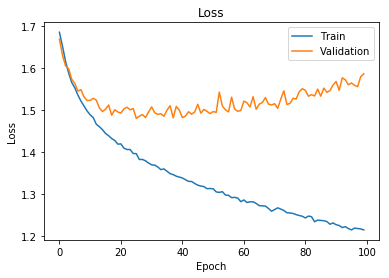

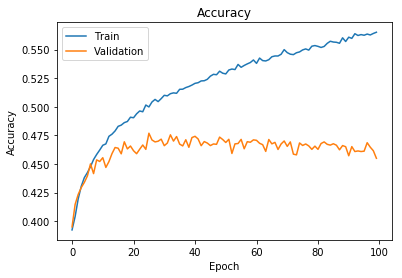

In [15]:
optimizers(opt = 'adam', epoch = 100)

Train on 50000 samples, validate on 10000 samples
Epoch 1/300
50000/50000 [==============================] - 7s 140us/step - loss: 1.2194 - accuracy: 0.5617 - val_loss: 1.5761 - val_accuracy: 0.4664
Epoch 2/300
50000/50000 [==============================] - 7s 138us/step - loss: 1.2103 - accuracy: 0.5649 - val_loss: 1.5746 - val_accuracy: 0.4609
Epoch 3/300
50000/50000 [==============================] - 7s 139us/step - loss: 1.2120 - accuracy: 0.5656 - val_loss: 1.5891 - val_accuracy: 0.4641
Epoch 4/300
50000/50000 [==============================] - 7s 137us/step - loss: 1.2041 - accuracy: 0.5689 - val_loss: 1.5740 - val_accuracy: 0.4600
Epoch 5/300
50000/50000 [==============================] - 7s 139us/step - loss: 1.2057 - accuracy: 0.5682 - val_loss: 1.5876 - val_accuracy: 0.4581
Epoch 6/300
50000/50000 [==============================] - 7s 137us/step - loss: 1.2053 - accuracy: 0.5689 - val_loss: 1.5706 - val_accuracy: 0.4613
Epoch 7/300
50000/50000 [==============================]

50000/50000 [==============================] - 7s 136us/step - loss: 1.1460 - accuracy: 0.5902 - val_loss: 1.6955 - val_accuracy: 0.4509
Epoch 56/300
50000/50000 [==============================] - 7s 140us/step - loss: 1.1467 - accuracy: 0.5881 - val_loss: 1.6896 - val_accuracy: 0.4459
Epoch 57/300
50000/50000 [==============================] - 7s 149us/step - loss: 1.1443 - accuracy: 0.5891 - val_loss: 1.6809 - val_accuracy: 0.4532
Epoch 58/300
50000/50000 [==============================] - 7s 137us/step - loss: 1.1421 - accuracy: 0.5913 - val_loss: 1.6875 - val_accuracy: 0.4511
Epoch 59/300
50000/50000 [==============================] - 7s 137us/step - loss: 1.1447 - accuracy: 0.5892 - val_loss: 1.6725 - val_accuracy: 0.4548
Epoch 60/300
50000/50000 [==============================] - 7s 140us/step - loss: 1.1401 - accuracy: 0.5922 - val_loss: 1.6961 - val_accuracy: 0.4460
Epoch 61/300
50000/50000 [==============================] - 7s 137us/step - loss: 1.1375 - accuracy: 0.5924 - val

50000/50000 [==============================] - 7s 136us/step - loss: 1.1039 - accuracy: 0.6038 - val_loss: 1.7855 - val_accuracy: 0.4451
Epoch 110/300
50000/50000 [==============================] - 7s 141us/step - loss: 1.0927 - accuracy: 0.6078 - val_loss: 1.8004 - val_accuracy: 0.4467
Epoch 111/300
50000/50000 [==============================] - 7s 140us/step - loss: 1.0927 - accuracy: 0.6078 - val_loss: 1.8172 - val_accuracy: 0.4384
Epoch 112/300
50000/50000 [==============================] - 7s 136us/step - loss: 1.1014 - accuracy: 0.6041 - val_loss: 1.8031 - val_accuracy: 0.4459
Epoch 113/300
50000/50000 [==============================] - 7s 139us/step - loss: 1.0944 - accuracy: 0.6085 - val_loss: 1.8067 - val_accuracy: 0.4491
Epoch 114/300
50000/50000 [==============================] - 7s 137us/step - loss: 1.0904 - accuracy: 0.6088 - val_loss: 1.8287 - val_accuracy: 0.44512 - accuracy: 0.
Epoch 115/300
50000/50000 [==============================] - 7s 136us/step - loss: 1.0933 - 

50000/50000 [==============================] - 7s 137us/step - loss: 1.0594 - accuracy: 0.6185 - val_loss: 1.8625 - val_accuracy: 0.4397
Epoch 163/300
50000/50000 [==============================] - 7s 137us/step - loss: 1.0560 - accuracy: 0.6218 - val_loss: 1.8995 - val_accuracy: 0.4449
Epoch 164/300
50000/50000 [==============================] - 7s 139us/step - loss: 1.0558 - accuracy: 0.6211 - val_loss: 1.8840 - val_accuracy: 0.4446
Epoch 165/300
50000/50000 [==============================] - 7s 138us/step - loss: 1.0554 - accuracy: 0.6213 - val_loss: 1.9217 - val_accuracy: 0.4410
Epoch 166/300
50000/50000 [==============================] - 7s 136us/step - loss: 1.0611 - accuracy: 0.6200 - val_loss: 1.9268 - val_accuracy: 0.4351
Epoch 167/300
50000/50000 [==============================] - 7s 137us/step - loss: 1.0548 - accuracy: 0.6205 - val_loss: 1.8943 - val_accuracy: 0.4423
Epoch 168/300
50000/50000 [==============================] - 7s 138us/step - loss: 1.0536 - accuracy: 0.6225

50000/50000 [==============================] - 7s 136us/step - loss: 1.0293 - accuracy: 0.6308 - val_loss: 1.9797 - val_accuracy: 0.4424
Epoch 217/300
50000/50000 [==============================] - 7s 139us/step - loss: 1.0329 - accuracy: 0.6273 - val_loss: 2.0201 - val_accuracy: 0.4388
Epoch 218/300
50000/50000 [==============================] - 7s 137us/step - loss: 1.0326 - accuracy: 0.6306 - val_loss: 1.9951 - val_accuracy: 0.4402
Epoch 219/300
50000/50000 [==============================] - 7s 136us/step - loss: 1.0276 - accuracy: 0.6309 - val_loss: 2.0040 - val_accuracy: 0.4424
Epoch 220/300
50000/50000 [==============================] - 7s 139us/step - loss: 1.0236 - accuracy: 0.6306 - val_loss: 2.0332 - val_accuracy: 0.4361
Epoch 221/300
50000/50000 [==============================] - 7s 139us/step - loss: 1.0288 - accuracy: 0.6312 - val_loss: 1.9813 - val_accuracy: 0.4393
Epoch 222/300
50000/50000 [==============================] - 7s 136us/step - loss: 1.0196 - accuracy: 0.6339

50000/50000 [==============================] - 7s 140us/step - loss: 1.0137 - accuracy: 0.6349 - val_loss: 2.0673 - val_accuracy: 0.4314
Epoch 271/300
50000/50000 [==============================] - 7s 140us/step - loss: 1.0080 - accuracy: 0.6358 - val_loss: 2.1355 - val_accuracy: 0.4365
Epoch 272/300
50000/50000 [==============================] - 7s 137us/step - loss: 0.9975 - accuracy: 0.6431 - val_loss: 2.0897 - val_accuracy: 0.4340
Epoch 273/300
50000/50000 [==============================] - 7s 138us/step - loss: 0.9984 - accuracy: 0.6391 - val_loss: 2.1567 - val_accuracy: 0.4339
Epoch 274/300
50000/50000 [==============================] - 7s 140us/step - loss: 1.0016 - accuracy: 0.6397 - val_loss: 2.0986 - val_accuracy: 0.4344
Epoch 275/300
50000/50000 [==============================] - 7s 137us/step - loss: 1.0051 - accuracy: 0.6379 - val_loss: 2.0851 - val_accuracy: 0.4334
Epoch 276/300
50000/50000 [==============================] - 7s 139us/step - loss: 1.0031 - accuracy: 0.6401

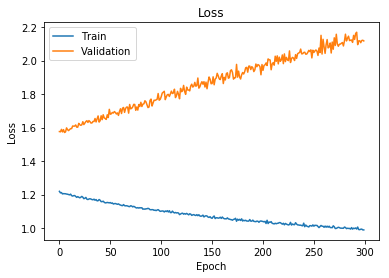

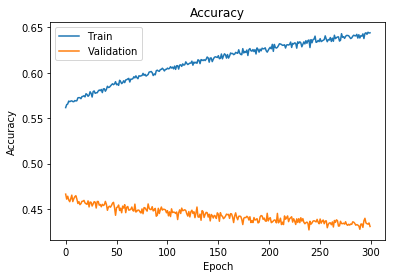

In [16]:
optimizers(opt = 'adam', epoch = 300)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 106us/step - loss: 0.9401 - accuracy: 0.6674 - val_loss: 2.1484 - val_accuracy: 0.4331
Epoch 2/100
50000/50000 [==============================] - 6s 114us/step - loss: 0.9351 - accuracy: 0.6675 - val_loss: 2.1816 - val_accuracy: 0.4257
Epoch 3/100
50000/50000 [==============================] - 5s 110us/step - loss: 0.9338 - accuracy: 0.6678 - val_loss: 2.1440 - val_accuracy: 0.4369
Epoch 4/100
50000/50000 [==============================] - 5s 108us/step - loss: 0.9326 - accuracy: 0.6697 - val_loss: 2.1816 - val_accuracy: 0.4284
Epoch 5/100
50000/50000 [==============================] - 5s 109us/step - loss: 0.9329 - accuracy: 0.6671 - val_loss: 2.1769 - val_accuracy: 0.4301
Epoch 6/100
50000/50000 [==============================] - 5s 109us/step - loss: 0.9323 - accuracy: 0.6687 - val_loss: 2.1921 - val_accuracy: 0.4302
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 5s 105us/step - loss: 0.9230 - accuracy: 0.6729 - val_loss: 2.2247 - val_accuracy: 0.4301
Epoch 56/100
50000/50000 [==============================] - 5s 106us/step - loss: 0.9230 - accuracy: 0.6723 - val_loss: 2.2411 - val_accuracy: 0.4308
Epoch 57/100
50000/50000 [==============================] - 5s 106us/step - loss: 0.9224 - accuracy: 0.6720 - val_loss: 2.2589 - val_accuracy: 0.4316
Epoch 58/100
50000/50000 [==============================] - 5s 107us/step - loss: 0.9223 - accuracy: 0.6719 - val_loss: 2.2297 - val_accuracy: 0.4321
Epoch 59/100
50000/50000 [==============================] - 5s 106us/step - loss: 0.9223 - accuracy: 0.6730 - val_loss: 2.2190 - val_accuracy: 0.4321
Epoch 60/100
50000/50000 [==============================] - 5s 106us/step - loss: 0.9221 - accuracy: 0.6733 - val_loss: 2.2377 - val_accuracy: 0.4300
Epoch 61/100
50000/50000 [==============================] - 5s 106us/step - loss: 0.9227 - accuracy: 0.6712 - val

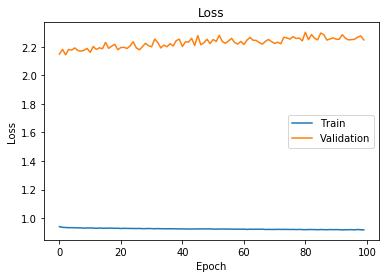

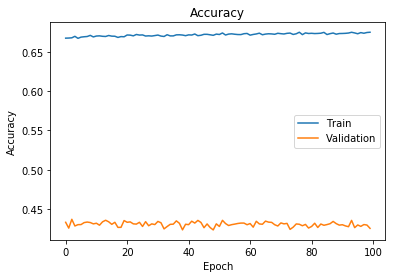

In [17]:
optimizers(epoch = 100)